In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.insert(0, "../../code-previous")

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import sklearn.feature_extraction as skfeatures
import time
import os

import operator

import seaborn as sns
sns.set()

import string
import swifter
import nltk
stopwords = nltk.corpus.stopwords.words('english')


import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='sreejith_s', api_key='rcet0rTqFCc3WeOzWTjv')



from sklearn.feature_extraction.text import CountVectorizer


from unicodedata import category
from tqdm import tqdm
tqdm.pandas(desc="Progress")

import seaborn as sns
sns.set_style('white')
import matplotlib.pylab as plt

In [4]:
data_path = "/mnt/disks/vault/analysis-data/interdisciplinary-novelty-analysis/all_discipline_data.pql"

#data_path = "/mnt/disks/vault/analysis-data/interdisciplinary-novelty-analysis/physics.pql"
data = pd.read_pickle(data_path)

In [13]:
data.columns

Index(['ArticleID', 'Type', 'Label', 'PubYear', 'Doctypes', 'Title', 'Journal',
       'Journal Abbreviation ISO', 'title_without_stopwords'],
      dtype='object')

In [36]:
disciplines = ["Architecture","Art","Humanities, Multidisciplinary","Folklore","Medieval & Renaissance Studies","Asian Studies","Classics","Dance","Film, Radio, Television","History","History & Philosophy of Science","Literary Theory & Criticism","Literary Reviews","Literature","Literature, African, Australian, Canadian","Literature, American","Literature, British Isles","Literature, German, Dutch, Scandinavian","Literature, Romance","Literature, Slavic","Poetry","Music","Philosophy","Religion","Theater","Agriculture, Dairy & Animal Science","Agricultural Engineering","Agricultural Economics & Policy","Agriculture, Multidisciplinary","Agronomy","Horticulture","Soil Science","Allergy","Anatomy & Morphology","Anesthesiology","Anthropology","Audiology & Speech-Language Pathology","Behavioral Sciences","Biochemical Research Methods","Biochemistry & Molecular Biology","Biodiversity Conservation","Biophysics","Biotechnology & Applied Microbiology","Cardiac & Cardiovascular Systems","Peripheral Vascular Disease","Cell & Tissue Engineering","Cell Biology","Dentistry, Oral Surgery & Medicine","Dermatology","Developmental Biology","Emergency Medicine","Andrology","Endocrinology & Metabolism","Entomology","Ecology","Environmental Sciences","Environmental Studies","Evolutionary Biology","Fisheries","Food Science & Technology","Forestry","Gastroenterology & Hepatology","Critical Care Medicine","Primary Health Care","Medicine, General & Internal","Genetics & Heredity","Geriatrics & Gerontology","Gerontology","Health Care Sciences & Services","Health Policy & Services","Hematology","Immunology","Infectious Diseases","Integrative & Complementary Medicine","Medicine, Legal","Biology","Limnology","Marine & Freshwater Biology","Mathematical & Computational Biology","Medical Ethics","Medical Informatics","Medical Laboratory Technology","Microbiology","Mycology","Clinical Neurology","Neurosciences","Neuroimaging","Nursing","Nutrition & Dietetics","Obstetrics & Gynecology","Oncology","Ophthalmology","Orthopedics","Otorhinolaryngology","Paleontology","Parasitology","Pathology","Pediatrics","Chemistry, Medicinal","Pharmacology & Pharmacy","Physiology","Plant Sciences","Psychiatry","Public, Environmental & Occupational Health","Radiology, Nuclear Medicine & Medical Imaging","Rehabilitation","Reproductive Biology","Medicine, Research & Experimental","Respiratory System","Rheumatology","Sport Sciences","Substance Abuse","Surgery","Toxicology","Transplantation","Tropical Medicine","Urology & Nephrology","Veterinary Sciences","Virology","Ornithology","Zoology","Astronomy & Astrophysics","Chemistry, Applied","Chemistry, Multidisciplinary","Chemistry, Analytical","Chemistry, Inorganic & Nuclear","Chemistry, Organic","Chemistry, Physical","Crystallography","Electrochemistry","Geochemistry & Geophysics","Geology","Geosciences, Multidisciplinary","Mathematics, Applied","Mathematics, Interdisciplinary Applications","Mathematics","Statistics & Probability","Meteorology & Atmospheric Sciences","Mineralogy","Mining & Mineral Processing","Oceanography","Optics","Geography, Physical","Physics, Applied","Physics, Fluids & Plasmas","Physics, Atomic, Molecular & Chemical","Physics, Multidisciplinary","Physics, Condensed Matter","Physics, Nuclear","Physics, Particles & Fields","Physics, Mathematical","Polymer Science","Thermodynamics","Water Resources","Nanoscience & Nanotechnology","Logic","Multidisciplinary Sciences","Acoustics","Automation & Control Systems","Computer Science, Artificial Intelligence","Computer Science, Cybernetics","Computer Science, Hardware & Architecture","Computer Science, Information Systems","Computer Science, Interdisciplinary Applications","Computer Science, Software Engineering","Computer Science, Theory & Methods","Construction & Building Technology","Energy & Fuels","Engineering, Aerospace","Engineering, Multidisciplinary","Engineering, Biomedical","Engineering, Environmental","Engineering, Chemical","Engineering, Industrial","Engineering, Manufacturing","Engineering, Marine","Engineering, Civil","Engineering, Ocean","Engineering, Petroleum","Engineering, Electrical & Electronic","Engineering, Mechanical","Engineering, Geological","Ergonomics","Imaging Science & Photographic Technology","Information Science & Library Science","Instruments & Instrumentation","Materials Science, Paper & Wood","Materials Science, Ceramics","Materials Science, Multidisciplinary","Materials Science, Biomaterials","Materials Science, Characterization & Testing","Materials Science, Coatings & Films","Materials Science, Composites","Materials Science, Textiles","Mechanics","Metallurgy & Metallurgical Engineering","Microscopy","Nuclear Science & Technology","Operations Research & Management Science","Remote Sensing","Robotics","Spectroscopy","Telecommunications","Transportation","Transportation Science & Technology","Archaeology","Area Studies","Social Sciences, Biomedical","Business","Business, Finance","Economics","Industrial Relations & Labor","Management","Communication","Criminology & Penology","Cultural Studies","Demography","Education & Educational Research","Education, Scientific Disciplines","Education, Special","Ethnic Studies","Family Studies","Geography","Law","Political Science","International Relations","Linguistics","Language & Linguistics","Social Sciences, Mathematical Methods","Psychology, Biological","Psychology, Clinical","Psychology, Educational","Psychology, Developmental","Psychology, Applied","Psychology","Psychology, Multidisciplinary","Psychology, Psychoanalysis","Psychology, Mathematical","Psychology, Experimental","Psychology, Social","Planning & Development","Public Administration","Social Issues","Ethics","History of Social Sciences","Hospitality, Leisure, Sport & Tourism","Social Sciences, Interdisciplinary","Social Work","Sociology","Urban Studies","Women's Studies"]

In [37]:
data = data[data['Label'].isin(disciplines)]

In [47]:
yearly_count = data[['ArticleID','PubYear']].groupby('PubYear').count()
yearly_count.head()

,ArticleID
PubYear,
1900,21158
1901,23417
1902,23163
1903,20754
1904,23873


In [38]:
yearly_count = yearly_count.reset_index()
yearly_count.columns = ['year', 'count']
yearly_count["log_count"] = yearly_count["count"].apply(lambda x: np.log(x))

Text(0,0.5,'Count (Log scale)')

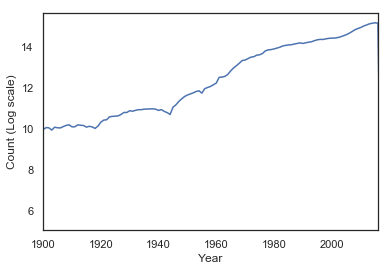

In [39]:
f = plt.figure()
ax = f.add_subplot(111)
ax.plot(yearly_count["year"], yearly_count["log_count"])
ax.set_xlim(1900, 2016)
ax.set_xlabel("Year")
ax.set_ylabel("Count (Log scale)")

In [45]:
discipline_count = data[['Label','ArticleID']].groupby('Label').count()
discipline_count = discipline_count.reset_index()

In [46]:
discipline_count.head()

,Label,ArticleID
0,Acoustics,270712
1,Agricultural Economics & Policy,24309
2,Agricultural Engineering,52798
3,"Agriculture, Dairy & Animal Science",206949
4,"Agriculture, Multidisciplinary",198340


In [48]:
discipline_count.columns = ['label', 'count']
discipline_count["log_count"] = discipline_count["count"].apply(lambda x: np.log(x))

In [ ]:
f = plt.figure()
ax = f.add_subplot(111)
ax.plot(discipline_count["Label"], yearly_count["log_count"])
ax.set_xlim(1900, 2016)
ax.set_xlabel("Year")
ax.set_ylabel("Count (Log scale)")